# LDA - Sentences - Iterative filtering - Run 2

Note: 

This notebook loads the models from f1000_LDA_Sentence_Run_2 and returns "f1000_tokenized_LDA_sentence_3.tsv", which is the input for "f1000_LDA_Sentence_Run" with ITER = 3.

## Configuration

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import re
from collections import defaultdict  # For word frequency
from operator import itemgetter
from tqdm import tqdm_notebook as tqdm
import IPython #for HTML viz

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

from peertax.LDA_Diagnostic import LDA_Conv, LDA_Scores

## Model selection

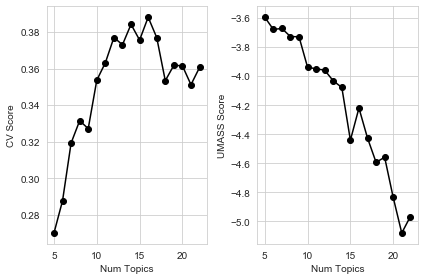

In [2]:
base_pth = './f1000_LDA_Sentence_Run_2/'
cv_arr, um_arr = LDA_Scores(base_pth)

plt.subplot(1,2,1)
plt.plot(cv_arr[:,0],cv_arr[:,1],'ko-')
plt.ylabel("CV Score")
plt.xlabel("Num Topics")

plt.subplot(1,2,2)
plt.plot(um_arr[:,0],um_arr[:,1],'ko-')
plt.ylabel("UMASS Score")
plt.xlabel("Num Topics")
plt.tight_layout()

Best model (highest CV Score) is Model_16.

Load corpus from Run_2 and Model_16.

In [3]:
num_topics = '16'
model_no = 'Model_' + num_topics
model_pth = base_pth + model_no

# Load sentence data from tsv
path_load_tsv = '../pickles/f1000_tokenized_LDA_sentence_2.tsv'
df = pd.read_csv(path_load_tsv,sep='\t',quoting=csv.QUOTE_NONE)
df.drop(columns=['Unnamed: 0'],inplace=True)
df['token'] = df['token'].str.split(',')

# Create Corpus
texts = df['token']
#Load Model
lda_model = gensim.models.ldamodel.LdaModel.load(model_pth)
id2word = gensim.corpora.Dictionary.load(model_pth + '.id2word')
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
print('Total number of sentences: %s' % len(corpus))

INFO - 12:55:04: loading LdaModel object from ./f1000_LDA_Sentence_Run_2/Model_16
INFO - 12:55:04: loading expElogbeta from ./f1000_LDA_Sentence_Run_2/Model_16.expElogbeta.npy with mmap=None
INFO - 12:55:04: setting ignored attribute dispatcher to None
INFO - 12:55:04: setting ignored attribute id2word to None
INFO - 12:55:04: setting ignored attribute state to None
INFO - 12:55:04: loaded ./f1000_LDA_Sentence_Run_2/Model_16
INFO - 12:55:04: loading LdaState object from ./f1000_LDA_Sentence_Run_2/Model_16.state
INFO - 12:55:04: loaded ./f1000_LDA_Sentence_Run_2/Model_16.state
INFO - 12:55:04: loading Dictionary object from ./f1000_LDA_Sentence_Run_2/Model_16.id2word
INFO - 12:55:04: loaded ./f1000_LDA_Sentence_Run_2/Model_16.id2word


Total number of sentences: 72451


Check convergence.

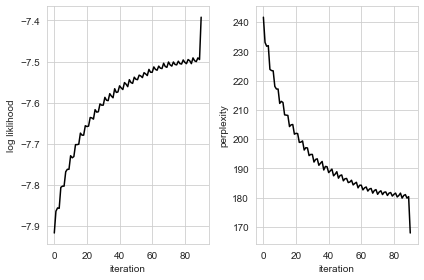

In [4]:
iter_no, perplexity, likelihood = LDA_Conv(base_pth,num_topics)
plt.subplot(1,2,1)
plt.plot(iter_no,likelihood,c="black")
plt.ylabel("log liklihood")
plt.xlabel("iteration")

plt.subplot(1,2,2)
plt.plot(iter_no,perplexity,c="black")
plt.ylabel("perplexity")
plt.xlabel("iteration")
plt.tight_layout()

Show topic visulization.

In [5]:
IPython.display.HTML(filename=model_pth+'.html')

Show topic contents (text).

In [6]:
lda_model.show_topics(num_topics=25, num_words=10, log=False, formatted=True)

[(0,
  '0.082*"use" + 0.043*"sentence" + 0.041*"paragraph" + 0.031*"term" + 0.030*"case" + 0.027*"introduction" + 0.020*"word" + 0.019*"author" + 0.011*"course" + 0.011*"end"'),
 (1,
  '0.040*"research" + 0.037*"section" + 0.031*"write" + 0.017*"article" + 0.014*"paper" + 0.010*"work" + 0.010*"project" + 0.010*"form" + 0.009*"develop" + 0.009*"new"'),
 (2,
  '0.112*"figure" + 0.044*"et_al" + 0.031*"show" + 0.026*"page" + 0.026*"text" + 0.025*"table" + 0.019*"line" + 0.014*"indicate" + 0.014*"image" + 0.013*"plot"'),
 (3,
  '0.081*"point" + 0.039*"author" + 0.015*"agree" + 0.014*"reviewer" + 0.014*"important" + 0.013*"science" + 0.013*"issue" + 0.012*"argument" + 0.011*"patient" + 0.010*"research"'),
 (4,
  '0.043*"value" + 0.041*"model" + 0.014*"example" + 0.013*"function" + 0.012*"comparison" + 0.012*"statement" + 0.012*"know" + 0.010*"true" + 0.010*"helpful" + 0.009*"clear"'),
 (5,
  '0.068*"different" + 0.015*"variable" + 0.015*"group" + 0.013*"distribution" + 0.013*"result" + 0.012

Assign topics to initial dataframe.

In [7]:
topics = [max(lda_model.get_document_topics(row),key=itemgetter(1))[0] for row in tqdm(corpus)]

In [8]:
df['topics'] = topics
df.head()

,manuscript_ID,review_ID,sentences,token,topics
0,10.12688/f1000research.1-1.v1,10.5256/f1000research.50.r101,"However, I am sure there are some sections whe...","[sure, section, reader, like, information, adj...",3
1,10.12688/f1000research.1-1.v1,10.5256/f1000research.50.r100,This paper has a number of serious flaws.,"[paper, number, flaw]",10
2,10.12688/f1000research.1-1.v1,10.5256/f1000research.50.r100,a) The literature is quoted selectively and is...,"[literature, quote, selectively, issue, oversi...",14
3,10.12688/f1000research.1-1.v1,10.5256/f1000research.50.r100,For example it doesn t reference articles such...,"[example, doesn, reference, article]",14
4,10.12688/f1000research.1-1.v1,10.5256/f1000research.50.r100,A single citation (a paper by the same author)...,"[single, citation, paper, author, claim, provide]",9


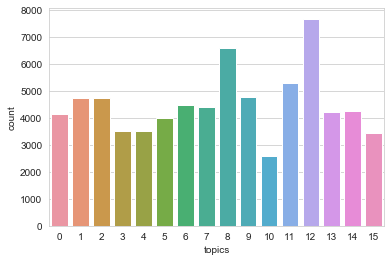

In [9]:
sns.countplot(x='topics',data=df);

All the "bad" topics have been filtered, but a number of technical words remain prominent in the topics. Filter them manually.

Create dictionary of keywords to use as "stopwords".

In [10]:
#Based on Model 16 topics:
#Topic 2
set_1 = ['cell']
#Topic 4
set_2 = ['idp','matrix']
#Topic 5
set_3 = ['stimulus','gene']
#Topic 7
set_4 = ['type','day','genome']
#Topic_8
set_5 = ['cytoscape']
#Topic_10
set_6 = ['woman','gender','couple','man']
#Topic 13
set_7 = ['health','oa']
#Topic 15
set_8 = ['specie','age']


custom_stop = list(set(set_1 + set_2 + set_3 + set_4 + \
                       set_5 + set_6 + set_7 + set_8))

Remove stopwords.

In [11]:
import spacy
from time import time
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

# Custom function for removing custom stopwords
def remove_stop(doc):
    txt = [token.text for token in doc if token.text not in custom_stop]  #STOPWORDS
    # Remove short sentences
    if len(txt) > 2:
        return txt
    
t = time()
brief_cleaning = (' '.join(row) for row in df['token'])
txt = [remove_stop(doc) for doc in tqdm(nlp.pipe(brief_cleaning,batch_size=500),total = len(df))]
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))


Time to clean up everything: 1.27 mins


Put results in a dataframe to remove missing values.

In [12]:
df_clean = pd.DataFrame({'token': txt},index=df.index)
df_clean = df_clean.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71455 entries, 0 to 72450
Data columns (total 1 columns):
token    71455 non-null object
dtypes: object(1)
memory usage: 1.1+ MB


Merge with initial dataset to retain indexing.

In [13]:
df_cleaned_stop = pd.concat([df.drop('token',axis=1), df_clean], axis=1, join='inner')
df_cleaned_stop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71455 entries, 0 to 72450
Data columns (total 5 columns):
manuscript_ID    71455 non-null object
review_ID        71455 non-null object
sentences        71455 non-null object
topics           71455 non-null int64
token            71455 non-null object
dtypes: int64(1), object(4)
memory usage: 3.3+ MB


In [14]:
df.head()

,manuscript_ID,review_ID,sentences,token,topics
0,10.12688/f1000research.1-1.v1,10.5256/f1000research.50.r101,"However, I am sure there are some sections whe...","[sure, section, reader, like, information, adj...",3
1,10.12688/f1000research.1-1.v1,10.5256/f1000research.50.r100,This paper has a number of serious flaws.,"[paper, number, flaw]",10
2,10.12688/f1000research.1-1.v1,10.5256/f1000research.50.r100,a) The literature is quoted selectively and is...,"[literature, quote, selectively, issue, oversi...",14
3,10.12688/f1000research.1-1.v1,10.5256/f1000research.50.r100,For example it doesn t reference articles such...,"[example, doesn, reference, article]",14
4,10.12688/f1000research.1-1.v1,10.5256/f1000research.50.r100,A single citation (a paper by the same author)...,"[single, citation, paper, author, claim, provide]",9


Save to tsv.

In [15]:
path_save_tsv = "../pickles/f1000_tokenized_LDA_sentence_3.tsv"
df_cleaned_stop['token'] = df_cleaned_stop['token'].str.join(',')
df_cleaned_stop.to_csv(path_save_tsv,sep='\t',quoting=csv.QUOTE_NONE)